### Interpretation of the results of solving the optimization task
The research: https://www.sciencedirect.com/science/article/pii/S0140988319302798

In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import matplotlib
from matplotlib import cm

#### 1. Total costs

Total cost data

In [2]:
costs = pd.read_csv("TotalCostVector.csv", header=None)
costs.columns = ["Total costs"]
costs.index = costs.index + 1
costs["Total costs (bln)"] = costs["Total costs"] / pow(10, 9)
costs.head()

,Total costs,Total costs (bln)
1,7.569765e+11,756.976525
2,7.566213e+11,756.621321
3,7.546836e+11,754.683619
4,7.544074e+11,754.407405
5,7.540830e+11,754.083042


Comparison of total costs for different scenarios

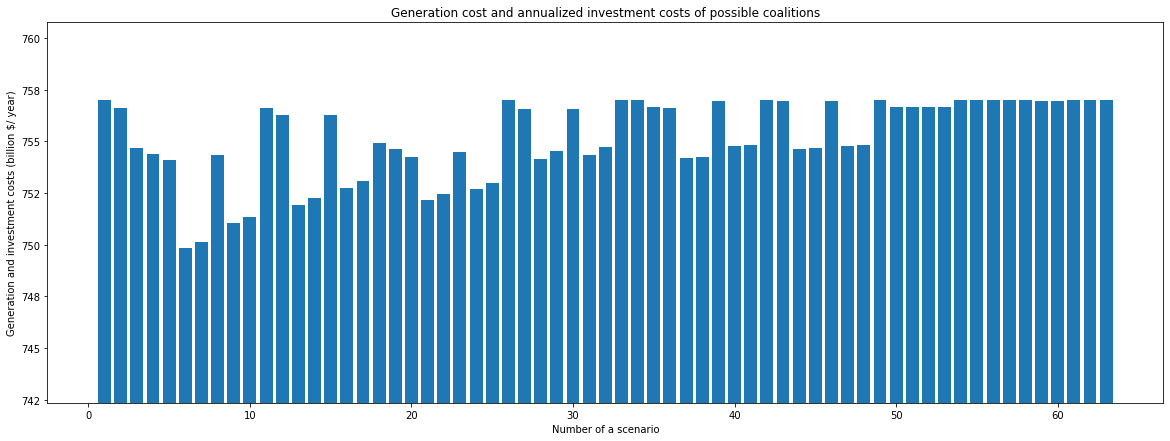

In [3]:
plt.figure(figsize=(20,7))
ax = plt.axes()

y = costs['Total costs (bln)']
x = costs.index

plt.bar(x, y)
ax.set_ylim([0.99 * y.min(), 1.005 * y.max()]);
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{:.0f}'.format(x)))
plt.title("Generation cost and annualized investment costs of possible coalitions")
plt.xlabel("Number of a scenario")
plt.ylabel("Generation and investment costs (billion $/ year)")
plt.show()

Source: original research (p. 11/16)

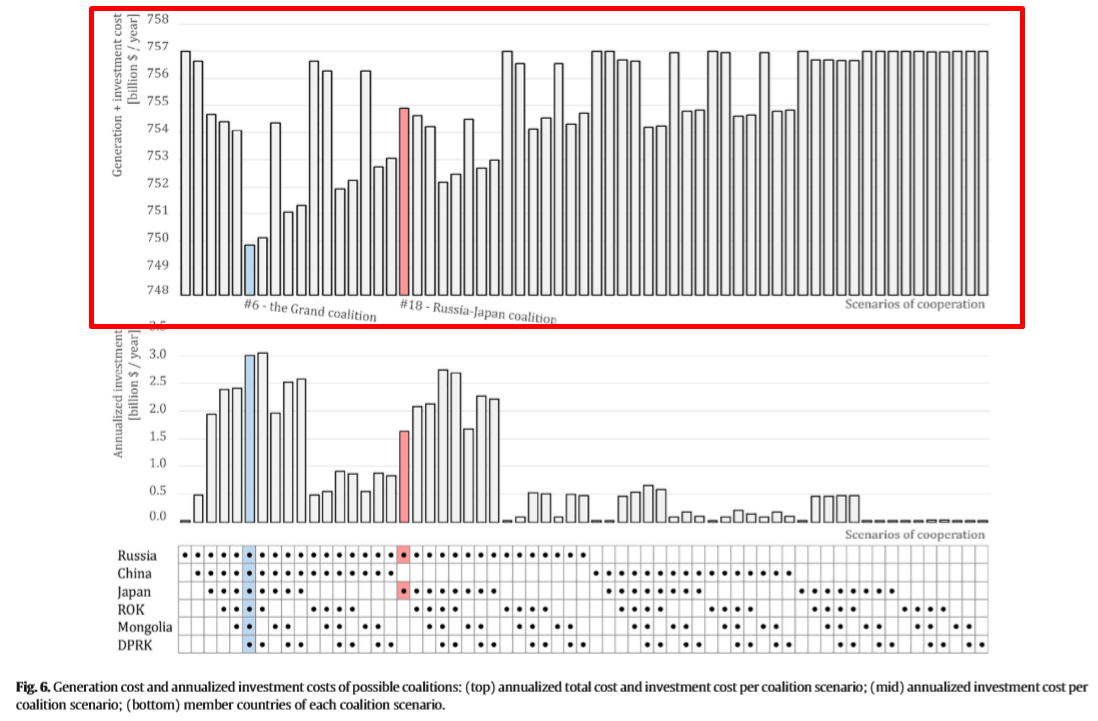